In [1]:
import tensorflow as tf

张量合并与分割

合并：拼接与堆叠

In [125]:
#拼接
a = tf.random.normal([4,35,8])
b = tf.random.normal([6,35,8])
tf.concat([a,b], axis=0).shape

TensorShape([10, 35, 8])

In [126]:
a = tf.random.normal([10,35,4])
b = tf.random.normal([10,35,4])
tf.concat([a,b], axis=2).shape

TensorShape([10, 35, 8])

In [8]:
#合并的维度，长度须一致
a = tf.random.normal([10,35,4])
b = tf.random.normal([4,32,4])
tf.concat([a,b], axis=0).shape

#ConcatOp : Dimension 1 in both shapes must be equal: shape[0] = [10,35,4] vs. shape[1] = [4,32,4]

InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} ConcatOp : Dimension 1 in both shapes must be equal: shape[0] = [10,35,4] vs. shape[1] = [4,32,4] [Op:ConcatV2] name: concat

使用 tf.stack(tensors, axis)可以堆叠方式合并多个张量，通过tensors 列表表示，参数axis指定新维度插入的位置，axis的用法与tf.expand_dims 的一致，当axis ≥ 0时，在axis之前插入；当axis < 0时，在axis之后插入新维度。例如shape 为[𝑏, 𝑐, ℎ, 𝑤]的张量，在不同位置通过stack 操作插入新维度，axis参数对应的插入位置设置如下图所示：
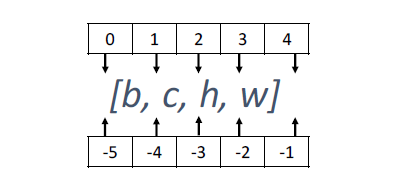

In [11]:
#堆叠（会创造新的维度）
a = tf.random.normal([35,8])
b = tf.random.normal([35,8])
tf.stack([a,b], axis=0).shape, tf.stack([a,b], axis=-1).shape

(TensorShape([2, 35, 8]), TensorShape([35, 8, 2]))

In [12]:
#使用tf.stack()时，待合并的张量shape必须完全一致

a = tf.random.normal([35,8])
b = tf.random.normal([35,4])
tf.stack([a,b], axis=0).shape

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [35,8] != values[1].shape = [35,4] [Op:Pack] name: stack

张量分割

通过tf.split(x, num_or_size_splits, axis)可以完成张量的分割操作。

当num_or_size_splits为单个数值时，如10，表示等长切割为10 份；当num_or_size_splits为List时，List的每个元素表示每份的长
度，如[2,4,2,2]表示切割为4份，每份的长度依次是2、4、2、2。

axis参数：指定分割的维度索引号

In [15]:
x = tf.random.normal([10,35,8])
result = tf.split(x, num_or_size_splits=10, axis=0)
len(result) #tf.split的返回值是一个包含张量的列表（List[tf.Tensor]）

10

In [16]:
#分割并不会删除维度
result[0].shape

TensorShape([1, 35, 8])

In [17]:
x = tf.random.normal([10,35,8])
result = tf.split(x, num_or_size_splits=[4,2,2,2], axis=0)
len(result), result[0].shape, result[1].shape

(4, TensorShape([4, 35, 8]), TensorShape([2, 35, 8]))

特别地，如果希望在某个维度上全部按长度为1的方式分割，还可以使用tf.unstack(x,axis)函数。这种方式是tf.split的一种特殊情况，切割长度固定为1，只需要指定切割维度的索引号即可。

In [18]:
x = tf.random.normal([10,35,8])
result = tf.unstack(x, axis=0)
len(result), result[0].shape

#tf.unstack是会删除维度的，这一点和tf.split有区别

(10, TensorShape([35, 8]))

# 数据统计

向量范数(Vector Norm)是表征向量“长度”的一种度量方法，它可以推广到张量上。在神经网络中，常用来表示张量的权值大小，梯度大小等。常用的向量范数有L1范数、L2范数、∞范数等。

In [21]:
x = tf.ones([2,2])
#计算L1、L2和∞范数
import numpy as np
tf.norm(x, ord=1), tf.norm(x, ord=2), tf.norm(x, ord=np.inf)

(<tf.Tensor: shape=(), dtype=float32, numpy=4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

最值、均值、和

假设有一个shape为[4, 10]的张量，第一个维度为样本数量，第二个维度为样本所属十个类别的概率。下面计算每个样本的概率最大值、最小值、平均值。

In [25]:
#在指定维度（即概率维度）上的最值和均值
x = tf.random.normal([4,10])
tf.reduce_max(x, axis=1), tf.reduce_min(x, axis=1), tf.reduce_mean(x, axis=1)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2.248604  , 1.3000786 , 0.84449095, 2.0049062 ], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.5636837, -1.6641495, -2.3166983, -0.6469041], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.4611761 , -0.09695584, -0.31521004,  0.17050974], dtype=float32)>)

In [26]:
#不指定维度的时候，统计全局的最值、均值
x = tf.random.normal([4,10])
tf.reduce_max(x), tf.reduce_min(x), tf.reduce_mean(x)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.4316761>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.7545053>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0511338>)

In [28]:
#Another Example: MSE误差均值
from tensorflow import keras

out = tf.random.normal([4,10])
y = tf.constant([1,2,2,0])
y = tf.one_hot(y, depth=10)
loss = keras.losses.mse(y, out)
loss = tf.reduce_mean(loss)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.0624083>

In [29]:
#求和
out = tf.random.normal([4,10])
tf.reduce_sum(out, axis=-1) #在最后一个维度求和

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.2418913 ,  1.8432375 ,  0.27690756,  1.7015018 ], dtype=float32)>

除了希望获取张量的最值信息，还希望获得最值所在的位置索引号，例如分类任务的标签预测，就需要知道概率最大值所在的位置索引号，一般把这个位置索引号作为预测类别。

In [30]:
#先创建一组样本
out = tf.random.normal([2,10])
out = tf.nn.softmax(out, axis=1) #通过softmax函数转换为概率值
out

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.07443904, 0.10277164, 0.12366758, 0.06051135, 0.14374416,
        0.02268741, 0.07035   , 0.0755621 , 0.07718573, 0.24908096],
       [0.13174042, 0.01519472, 0.21724297, 0.0175899 , 0.15799078,
        0.12757163, 0.07850946, 0.09845512, 0.03659589, 0.11910909]],
      dtype=float32)>

在上述样本中，根据每个样本对应分类的概率的最高值，可以推测样本属于该类别。

In [31]:
#求解最大值的索引
pred = tf.argmax(out, axis=1)
pred

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([9, 2], dtype=int64)>

张量比较

In [33]:
out = tf.random.normal([100,10]) #考虑100个样本的预测结果
out = tf.nn.softmax(out, axis=1)
pred = tf.argmax(out, axis=1)
pred

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([4, 2, 5, 1, 1, 6, 6, 1, 0, 2, 1, 5, 0, 9, 8, 7, 6, 3, 9, 0, 9, 4,
       3, 1, 8, 6, 3, 4, 3, 5, 9, 3, 8, 5, 6, 2, 5, 7, 0, 6, 5, 8, 0, 0,
       5, 2, 4, 2, 8, 4, 0, 8, 4, 7, 9, 2, 6, 4, 5, 1, 3, 1, 9, 9, 9, 4,
       6, 5, 5, 5, 4, 7, 6, 4, 8, 8, 2, 6, 7, 3, 2, 9, 5, 2, 7, 9, 2, 9,
       5, 8, 6, 6, 6, 1, 6, 3, 3, 9, 9, 6], dtype=int64)>

In [35]:
#生成一组结果，假设其为真实值
y = tf.random.uniform([100], dtype=tf.int64, maxval=10)
y

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([4, 7, 0, 5, 1, 0, 6, 6, 2, 2, 5, 8, 1, 2, 6, 3, 7, 9, 5, 4, 7, 2,
       8, 6, 1, 2, 9, 8, 4, 2, 9, 8, 7, 7, 2, 9, 9, 9, 1, 7, 6, 2, 8, 7,
       4, 2, 8, 4, 6, 9, 8, 0, 5, 2, 2, 7, 3, 0, 2, 7, 8, 5, 3, 0, 4, 0,
       0, 4, 4, 9, 8, 5, 2, 1, 3, 8, 9, 8, 2, 7, 9, 4, 0, 2, 6, 4, 9, 0,
       3, 1, 7, 9, 2, 7, 6, 2, 8, 9, 3, 6], dtype=int64)>

In [37]:
#将预测值与真实值进行比较
out = tf.equal(pred, y) #tf.equal()函数返回布尔类型的张量比较结果
out

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([ True, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True])>

In [39]:
out = tf.cast(out, dtype=tf.int32) #将布尔类型转换为整型，便于统计True的个数
correct = tf.reduce_sum(out)
correct #correct/100（本次样本数）=正确率

<tf.Tensor: shape=(), dtype=int32, numpy=11>

除了比较相等的tf.equal(a, b)函数，其它的比较函数用法类似：
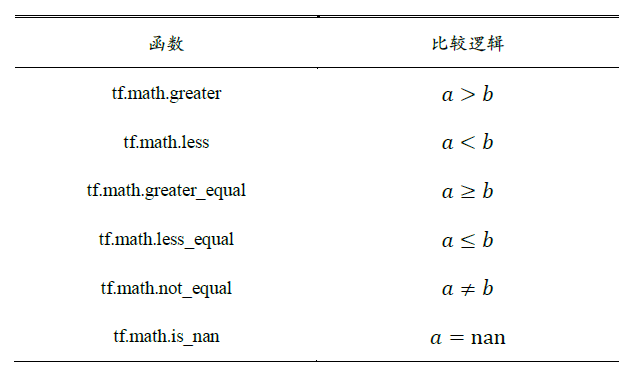

填充与复制

填充操作可以通过tf.pad(x, paddings)函数实现，参数paddings 是包含了多个[Left Padding, Right Padding]的嵌套方案List，如[[0,0], [2,1], [1,2]]表示第一个维度不填充，第二个维度左边(起始处)填充两个单元，右边(结束处)填充一个单元，第三个维度左边填充一个单元，右边填充两个单元。

In [41]:
a = tf.constant([1,2,3,4,5,6])
b = tf.constant([7,8,1,6])
b = tf.pad(b, [[0,2]])
b

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([7, 8, 1, 6, 0, 0])>

*《TensorFLow深度学习》5.4.1节最后提到了NLP和CV领域应用Padding的例子。

张量复制

参考数据变换小节的tf.tile()。除了对长度为1的维度进行复制，实际上，tf.tile()可以对任意长度的维度进行复制。

In [42]:
x = tf.random.normal([4,32,32,3])
tf.tile(x, [2,3,3,1]).shape

TensorShape([8, 96, 96, 3])

数据限幅

可以通过tf.maximum(x, a)实现数据的下限幅，即𝑥 ∈ [𝑎, +∞)；可
以通过tf.minimum(x, a)实现数据的上限幅，即𝑥 ∈ (−∞, 𝑎]。

In [43]:
x = tf.range(9)
tf.maximum(x, 3), tf.minimum(x, 7)

(<tf.Tensor: shape=(9,), dtype=int32, numpy=array([3, 3, 3, 3, 4, 5, 6, 7, 8])>,
 <tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 7])>)

In [44]:
#Another Example
#实现ReLU函数
def relu(x):
    return tf.maximum(x, 0.) #下限提高到0

In [47]:
#Another Example
x = tf.range(9)
tf.minimum(tf.maximum(x, 2), 7) #限幅2~7

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

In [48]:
#更方便地，可以使用tf.clip_by_value函数实现限幅
x = tf.range(9)
tf.clip_by_value(x, 2, 7)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7])>

高级操作

In [50]:
#tf.gather
#例如4个班级，每班35个学生，8科考试成绩
x = tf.random.uniform([4,35,8], maxval=100, dtype=tf.int32)
#收集前两个班级的成绩
tf.gather(x, [0,1], axis=0)

<tf.Tensor: shape=(2, 35, 8), dtype=int32, numpy=
array([[[15, 96,  9, 59, 72, 12, 48,  5],
        [78, 41, 73, 80,  2, 98,  6, 69],
        [14, 30, 59, 75, 33, 24, 26, 48],
        [23, 43, 51, 77, 67, 90, 66, 48],
        [99, 26,  8, 41,  0, 97, 15, 25],
        [38, 61, 47, 35,  1, 43, 46, 22],
        [38, 41, 36, 16,  0, 38, 61, 64],
        [92, 92, 40,  4, 59, 96, 93, 73],
        [ 2, 47, 10, 57, 77, 70, 92, 76],
        [37, 99, 54, 36, 54,  5,  3, 55],
        [10, 58, 58,  8, 33, 55, 65, 27],
        [22, 52, 18, 55, 78, 15, 21, 59],
        [39, 89, 92, 81, 62, 53, 54, 75],
        [75, 28, 26,  8, 20, 29,  4, 42],
        [16, 35, 63, 18, 19, 13, 67, 75],
        [80, 41,  7, 77, 43, 22, 21, 93],
        [67, 39, 16, 51, 77, 54, 51, 71],
        [46, 18, 72, 79, 25, 42, 84, 89],
        [74, 38, 27, 32, 88, 86, 83, 33],
        [ 0, 54, 62,  8, 81, 75, 20, 42],
        [19, 25, 40, 70, 50, 64, 70, 17],
        [83, 88,  8, 42, 41, 26, 58, 34],
        [99, 20, 55, 71, 5

In [52]:
#对于上面的需求，切片其实更加简单

x[:2]

#Python中的切片语法为 sequence[start:stop:step]， start默认为0，step默认为1
#stop 是2，这意味着切片将停止于索引2之前（即索引0和1的元素会被选中，索引2不会）

<tf.Tensor: shape=(2, 35, 8), dtype=int32, numpy=
array([[[15, 96,  9, 59, 72, 12, 48,  5],
        [78, 41, 73, 80,  2, 98,  6, 69],
        [14, 30, 59, 75, 33, 24, 26, 48],
        [23, 43, 51, 77, 67, 90, 66, 48],
        [99, 26,  8, 41,  0, 97, 15, 25],
        [38, 61, 47, 35,  1, 43, 46, 22],
        [38, 41, 36, 16,  0, 38, 61, 64],
        [92, 92, 40,  4, 59, 96, 93, 73],
        [ 2, 47, 10, 57, 77, 70, 92, 76],
        [37, 99, 54, 36, 54,  5,  3, 55],
        [10, 58, 58,  8, 33, 55, 65, 27],
        [22, 52, 18, 55, 78, 15, 21, 59],
        [39, 89, 92, 81, 62, 53, 54, 75],
        [75, 28, 26,  8, 20, 29,  4, 42],
        [16, 35, 63, 18, 19, 13, 67, 75],
        [80, 41,  7, 77, 43, 22, 21, 93],
        [67, 39, 16, 51, 77, 54, 51, 71],
        [46, 18, 72, 79, 25, 42, 84, 89],
        [74, 38, 27, 32, 88, 86, 83, 33],
        [ 0, 54, 62,  8, 81, 75, 20, 42],
        [19, 25, 40, 70, 50, 64, 70, 17],
        [83, 88,  8, 42, 41, 26, 58, 34],
        [99, 20, 55, 71, 5

In [55]:
#收集所有班级第1，4，9，12，13，27号同学的成绩
tf.gather(x, [0,3,8,11,12,26], axis=1)

<tf.Tensor: shape=(4, 6, 8), dtype=int32, numpy=
array([[[15, 96,  9, 59, 72, 12, 48,  5],
        [23, 43, 51, 77, 67, 90, 66, 48],
        [ 2, 47, 10, 57, 77, 70, 92, 76],
        [22, 52, 18, 55, 78, 15, 21, 59],
        [39, 89, 92, 81, 62, 53, 54, 75],
        [31, 86, 63, 17, 24, 80, 24, 35]],

       [[25, 31, 89, 76, 88, 56, 25,  8],
        [23, 91, 18, 48, 43, 24,  8, 12],
        [ 7, 38, 49, 38, 60, 40, 95,  4],
        [54, 23,  1,  6, 96, 63, 23, 51],
        [78, 20, 78, 17, 94, 72, 56,  1],
        [79, 89,  1, 38, 89, 59, 48, 57]],

       [[20, 86, 21, 30, 23, 52, 84,  1],
        [40, 79, 55, 27, 60, 86, 58, 78],
        [76, 36, 57, 28, 13, 11, 61, 83],
        [35, 62, 99, 15, 86, 82, 82, 49],
        [ 3, 38, 48, 92, 78,  3,  3, 52],
        [94, 93,  8, 47, 98, 66, 78,  8]],

       [[82, 40, 13, 17, 78, 75,  3, 84],
        [ 9, 18, 84, 34, 87, 80, 36, 16],
        [31, 48,  1, 51, 47,  8, 61, 65],
        [82, 99, 47, 92, 22, 36, 56, 91],
        [32, 70,  4, 

In [56]:
#tf.gather非常适合索引号没有规则的场景
a = tf.range(8)
a = tf.reshape(a,[4,2])
a

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])>

In [57]:
tf.gather(a, [3,1,0,2], axis=0)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[6, 7],
       [2, 3],
       [0, 1],
       [4, 5]])>

如果希望抽查第[2,3]班级的第[3,4,6,27]号同学的科目成绩，则可以通过组合多个tf.gather实现。

In [58]:
x = tf.random.uniform([4,35,8], maxval=100, dtype=tf.int32)
students = tf.gather(x, [1,2], axis=0)
tf.gather(students, [2,3,5,26], axis=1)

<tf.Tensor: shape=(2, 4, 8), dtype=int32, numpy=
array([[[19,  4, 43, 15, 81, 99, 13, 83],
        [66, 40, 78, 75, 86, 76, 99, 15],
        [38,  9, 71, 22, 51,  7, 29, 35],
        [53, 88, 67, 58, 98, 53, 48, 93]],

       [[19, 27, 10, 80, 73, 68, 31, 42],
        [ 0, 11, 14, 56, 19, 21, 10, 83],
        [88,  1, 67, 32, 16, 94, 75, 67],
        [24, 65, 48, 59, 99, 74, 89, 79]]])>

现在，抽查第2个班级的第2个同学的所有科目，第3个班级的第3个同学的所有科目，第4个班级的第4个同学的所有科目。

In [61]:
#方法一
tf.stack([x[1,1], x[2,2], x[3,3]], axis=0)

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[ 6, 41, 71, 27, 47, 89, 16,  9],
       [19, 27, 10, 80, 73, 68, 31, 42],
       [67, 83, 78, 97,  9, 78, 78, 68]])>

In [64]:
#方法二：tf.gather_nd
tf.gather_nd(x, [[1,1],[2,2],[3,3]])

#[..., [𝑖, 𝑗, 𝑘], ...]外层的括号长度为采样样本的个数，内层列表包含了每个采样点的索引坐标

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[ 6, 41, 71, 27, 47, 89, 16,  9],
       [19, 27, 10, 80, 73, 68, 31, 42],
       [67, 83, 78, 97,  9, 78, 78, 68]])>

tf.boolean_mask

In [65]:
#采样第1和第4个班级的数据
tf.boolean_mask(x, mask=[True, False, False, True], axis=0)

<tf.Tensor: shape=(2, 35, 8), dtype=int32, numpy=
array([[[76, 45, 50, 26, 41, 63,  5, 22],
        [35, 21, 69, 76, 62, 41, 27, 99],
        [58, 20, 53,  2, 83, 72, 95, 57],
        [ 6, 70, 84, 77, 37, 72, 41, 83],
        [42,  5,  2,  0, 38, 24, 94, 13],
        [74, 40, 90, 46, 71, 74, 87, 19],
        [38, 52, 14, 11, 92, 68, 62, 83],
        [82, 88, 42, 85, 49,  4, 26, 82],
        [15, 86, 95, 81, 67,  3, 91, 77],
        [45, 57, 51, 48, 59, 62, 78, 90],
        [82, 65, 12, 97, 15, 49, 17, 29],
        [35, 29,  6, 85, 24,  7, 83, 13],
        [27, 33, 53, 11, 15, 74, 77, 62],
        [88,  6, 78, 58, 64, 30, 77, 87],
        [37, 69, 62, 79, 70, 10, 75, 66],
        [68, 74, 77,  7, 23,  0, 66,  2],
        [46, 67, 82, 77, 26, 18,  5, 63],
        [ 2, 23, 98, 83, 83, 20, 32, 66],
        [72, 91, 84,  7, 34, 89, 68, 90],
        [33, 94, 35, 54, 31, 43, 82, 67],
        [37, 68, 70, 71, 44, 93, 62, 82],
        [ 1,  4, 50, 56, 65, 40, 74, 91],
        [20, 53,  5, 62, 1

tf.boolean_mask的用法其实与tf.gather非常类似，只不过一个通过掩码方式采样，一个直接给出索引号采样。

In [71]:
x = tf.random.uniform([2,3,8], maxval=100, dtype=tf.int32)

In [74]:
#效果等同于tf.gather_nd(x, [[0,0],[0,1],[1,1],[1,2]])
tf.boolean_mask(x, [[True,True,False],[False,True,True]])

<tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[17, 40, 77, 25, 75,  0, 56, 66],
       [52, 87, 20, 92, 21, 82,  2, 79],
       [74,  2, 27, 33,  5, 89, 43, 97],
       [87, 75, 17, 80, 76, 80, 86,  3]])>

可见tf.boolean_mask既可以实现了tf.gather方式的一维掩码采样，又可以实现tf.gather_nd方式的多维掩码采样。

tf.where(cond, a, b)根据条件选取参数，在每次选取参数的时候（对张量中每个参数进行选择时），如果对应的条件为真，返回a，否则返回b。

In [76]:
a = tf.ones([3,3])
b = tf.zeros([3,3])
#构造条件
cond = tf.constant([[True,False,False], [False,True,False], [True, True, False]])
tf.where(cond, a, b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

In [77]:
#当不指定参数时，即a=b=None，tf.where会返回cond张量中所有True的元素的索引坐标。
cond, tf.where(cond)

(<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
 array([[ True, False, False],
        [False,  True, False],
        [ True,  True, False]])>,
 <tf.Tensor: shape=(4, 2), dtype=int64, numpy=
 array([[0, 0],
        [1, 1],
        [2, 0],
        [2, 1]], dtype=int64)>)

In [78]:
#Example：提取张量中所有正数的数据和索引。
x = tf.random.normal([3,3])
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-1.3596482 ,  0.70378596,  0.8418375 ],
       [ 1.6082811 , -0.58256584,  0.72096765],
       [-0.5316984 ,  0.38118717, -0.3620641 ]], dtype=float32)>

In [82]:
mask = x > 0 #比较操作，等同于tf.math.greater()
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False,  True,  True],
       [ True, False,  True],
       [False,  True, False]])>

In [84]:
indices = tf.where(mask) #拿到索引
indices

<tf.Tensor: shape=(5, 2), dtype=int64, numpy=
array([[0, 1],
       [0, 2],
       [1, 0],
       [1, 2],
       [2, 1]], dtype=int64)>

In [85]:
tf.gather_nd(x, indices) #根据索引恢复出符号为正的元素

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.70378596, 0.8418375 , 1.6082811 , 0.72096765, 0.38118717],
      dtype=float32)>

In [86]:
#还可以通过tf.boolean_mask()来提取数据
tf.boolean_mask(x, mask)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.70378596, 0.8418375 , 1.6082811 , 0.72096765, 0.38118717],
      dtype=float32)>

scatter_nd

tf.scatter_nd(indices, updates, shape)函数可以高效地刷新（散布）张量的部分数据，但是这个函数只能在全0的白板张量上面执行刷新操作，因此可能需要结合其它操作来实现现有张量的数据刷新功能。

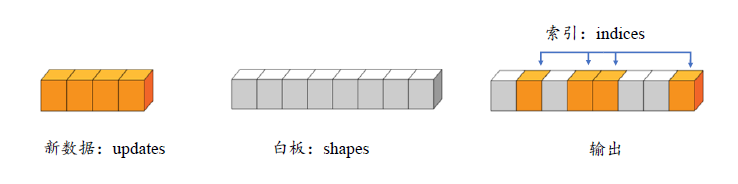

In [88]:
indices = tf.constant([[4],[3],[1],[7]])
updates = tf.constant([4.4, 3.3, 1.1, 7.7])
tf.scatter_nd(indices, updates, [8]) #在长度为8的全0向量上根据indices写入updates数据

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0. , 1.1, 0. , 3.3, 4.4, 0. , 0. , 7.7], dtype=float32)>

三位张量散布操作

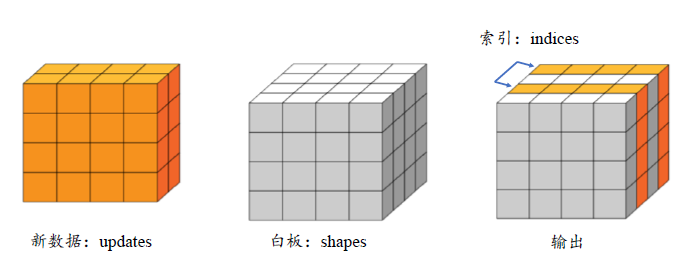

考虑3维张量的刷新例子，如上图所示，白板张量的shape为[4,4,4]，共有4个通道的特征图，每个通道大小为4×4，现有2个通道的新数据updates:[2,4,4]，需要写入索引为[1,3]的通道上。

In [89]:
#构造写入位置
indices = tf.constant([[1],[3]])
#构造写入数据，即2 个矩阵
updates = tf.constant(
    [[[5,5,5,5],[6,6,6,6],[7,7,7,7],[8,8,8,8]],
     [[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]]
    ])
#在shape为[4,4,4]白板上根据indices写入updates
tf.scatter_nd(indices, updates, [4,4,4])

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]]])>

meshgrid

tf.meshgrid函数可以方便地生成二维网格的采样点坐标，方便可视化等应用场合。考虑2个自变量x和y的Sinc函数表达式为:

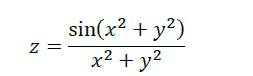

In [91]:
import numpy as np

def sinc_2d(x, y):
    return np.sinc(x) * np.sinc(y)

points = [] #空列表用以保存采样点
for x in range(-8, 8, 100):
    for y in range(-8, 8, 100):
        z = sinc_2d(x, y)
        points.append([x,y,z]) #由于加入了z维度，此处将存储一万个点的坐标

上述采样方式不够效率，考虑使用tf.meshgrid函数实现。

In [104]:
x = tf.linspace(-8, 8, 100) #tf.linspace用于在指定范围内生成一系列等间距分布的数值。
y = tf.linspace(-8, 8, 100)

x_shape, y_shape = x.shape, y.shape

x, y = tf.meshgrid(x, y) #生成网格点，并内部拆分后返回

x_shape, y_shape, x.shape, y.shape

(TensorShape([100]),
 TensorShape([100]),
 TensorShape([100, 100]),
 TensorShape([100, 100]))

In [108]:
#Sinc函数
z = tf.sqrt(x ** 2 + y ** 2)
z = tf.sin(z)/z

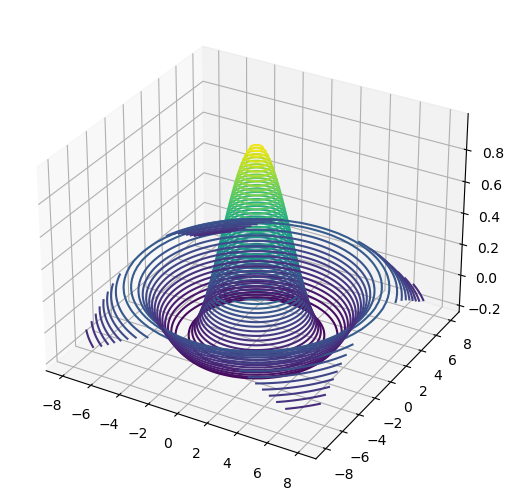

In [112]:
import matplotlib
from matplotlib import pyplot as plt

#导入3D坐标轴支持
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False) #Axes3D(fig) adding itself to the figure is deprecated since 3.4.
fig.add_axes(ax)  # 手动将ax添加到fig中

ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50)
#这里调用.numpy()方法来确保它们是NumPy数组。50表示要绘制的等高线的数量。

plt.show()

为什么要先import matplotlib再from matplotlib import pyplot as plt?

通过import matplotlib，你可以控制 matplotlib 使用哪个后端（backend）。后端决定了图形如何显示或保存。例如，如果你在没有显示界面的环境（如服务器）上运行代码，你可能需要设置一个非交互式后端：

matplotlib.use('Agg')  # 使用非交互式后端

这行代码必须在导入 pyplot 之前执行，这就是为什么先导入 matplotlib 的原因之一。

# 经典数据集加载

In [113]:
#自动加载MNIST数据集
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [114]:
(x, y), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


通过load_data()函数会返回相应格式的数据，对于图片数据集MNIST、CIFAR10等，会返回2个tuple，第一个tuple保存了用于训练的数据x和y训练集对象；第2 个tuple 则保存了用于测试的数据x_test和y_test 测试集对象，所有的数据都用Numpy 数组容器保存。

In [116]:
print('x:', x.shape, 'y:', y.shape,'x_test:', x_test.shape, 'y_test:', y_test.shape)

x: (60000, 28, 28) y: (60000,) x_test: (10000, 28, 28) y_test: (10000,)


数据加载进入内存后，需要转换成Dataset对象，才能利用TensorFlow 提供的各种便捷功能。通过Dataset.from_tensor_slices可以将训练部分的数据图片x 和标签y 都转换成Dataset对象。

In [117]:
#构建Dataset对象
train_db = tf.data.Dataset.from_tensor_slices((x, y))

随机打散

通过Dataset.shuffle(buffer_size)工具可以设置Dataset对象随机打散数据之间的顺序，防止每次训练时数据按固定顺序产生，从而使得模型尝试“记忆”住标签信息。buffer_size参数指定缓冲池的大小，一般设置为一个较大的常数即可。

In [119]:
train_db = train_db.shuffle(10000) #随机打散样本，不会打乱样本与标签的映射。

批训练

为了利用显卡的并行计算能力，一般在网络的计算过程中会同时计算多个样本，我们把这种训练方式叫做批训练，其中一个批中样本的数量叫做Batch Size。为了一次能够从Dataset中产生Batch Size数量的样本，需要设置Dataset为批训练方式。

In [120]:
train_db = train_db.batch(128)

Batch Size一般根据用户的GPU显存资源来设置，当显存不足时，可以适量减少Batch Size来减少算法的显存使用量。

预处理

从 keras.datasets中加载的数据集的格式大部分情况都不能直接满足模型的输入要求，需要进行预处理。Dataset对象通过提供map(func)工具函数，可以非常方便地调用用户自定义的预处理逻辑（即func）。

In [124]:
#预处理函数
def preprocess(x, y):
    #每一对(x, y)样本的维度均为[b,28,28],[b]
    #将输入转换为float32类型，因为原始数据可能是uint8类型（0-255），随后将灰度值归一化
    x = tf.cast(x, dtype=tf.float32)/255.
    #将二维图像转换为一维，这样可以将图像数据作为全连接层的输入。-1表示批次大小可以自动推断。
    x = tf.reshape(x, [-1, 28*28])
    #转换成整形张量，通常标签是类别索引，需要是整数类型以便进行后续的独热编码。
    y = tf.cast(y, dtype=tf.int32)
    #One-Hot Encoding，也可以在计算误差时进行One-Hot编码。
    y = tf.one_hot(y, depth=10)
    
    return x, y


#向map函数传入预处理函数的函数名，map方法会将preprocess函数应用到train_db中的每一个批次
train_db = train_db.map(preprocess)

对于输入值进行归一化：
1. 有助于梯度下降算法更平稳、更快速地收敛。
2. 一定程度避免梯度消失或梯度爆炸。
3. 归一化后的数据更接近一些激活函数的线性部分，避免了过多的饱和现象（输出接近0或1），从而保留了更多的信息。
4. 避免特征主导，提高泛化能力。

独热编码：

独热编码用于将类别数据转换为数值形式，特别是那些没有内在顺序的分类数据（如颜色、品牌等）。这种编码方式能够避免算法误认为类别之间存在数值上的关系。

循环训练

In [ ]:
#训练20个Epoch
for epoch in range(20):
    for step, (x,y) in enumerate(train_db): #完成一个Batch的数据训练，叫做一个Step
        #training...

使用 enumerate 时，你可以访问当前的步骤或索引，这在需要对迭代过程进行监控或需要基于索引执行某些操作（如日志记录、状态检查）时非常有用。

不使用 enumerate 的直接迭代：

for x, y in train_db:

这种方法直接迭代数据集对象，它只关心数据本身而不是迭代次数或位置。代码更简洁，如果不需要步骤信息，这是个好选择。

此外，还可以先将数据集直接重复20编（在for循环外），使得数据集对象内部遍历多次才会退出：

train_db = train_db.repeat(20)

In [ ]:
#初始化数据流水线时执行的操作
train_db = train_db.repeat(5)
train_db = train_db.shuffle(buffer_size=100)
train_db = train_db.batch(32)

......

#训练循环
for epoch in range(5):
    for step, (x, y) in enumerate(train_db):
        # 训练步骤，使用从定义好的流水线中获取的数据

初始化部分的代码只运行一次，用于设定数据处理的流程。

在每个for epoch in range(5):循环中，for step, (x, y) in enumerate(train_db):会从你已经定义好的、包括repeat和shuffle逻辑的数据流水线中拉取数据。每当你开始一个新的epoch，shuffle操作会根据之前的设置自动应用一次，而无需你手动在循环中再次调用。